In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
import pandas as pd
import numpy as np

# Define the dataset with more than 15 crops
data = {
    'Temperature': np.random.randint(20, 35, 2000),  # Temperature between 20 and 35 °C
    'Humidity': np.random.randint(50, 90, 2000),     # Humidity between 50% and 90%
    'Soil pH': np.round(np.random.uniform(5.5, 7.5, 2000), 2),  # Soil pH between 5.5 and 7.5
    'Rainfall': np.random.randint(50, 300, 2000),    # Rainfall between 50mm and 300mm
    'Crop': np.random.choice(['Rice', 'Maize', 'Wheat', 'Barley', 'Cotton', 'Soybean', 'Oats', 'Sugarcane', 
                              'Tea', 'Coffee', 'Jute', 'Tobacco', 'Groundnut', 'Mustard', 'Chili', 
                              'Potato', 'Onion', 'Tomato', 'Garlic', 'Pulses'], 2000)  # List of crops
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()
# Save the dataset to a CSV file
df.to_csv('crop_recommendation_data_full.csv', index=False)


In [4]:
# Display all rows of the dataset
print(df)


      Temperature  Humidity  Soil pH  Rainfall       Crop
0              34        76     7.01       236        Tea
1              21        60     6.78        75      Chili
2              20        71     6.31       249     Garlic
3              31        58     6.07       149        Tea
4              27        81     5.51        52     Pulses
...           ...       ...      ...       ...        ...
1995           23        50     7.03       184     Coffee
1996           34        87     5.52       157  Groundnut
1997           22        58     6.91       132     Tomato
1998           26        57     6.92       102      Wheat
1999           24        66     5.96       263      Onion

[2000 rows x 5 columns]


In [5]:
# Label Encoding the 'Crop' column
encoder = LabelEncoder()
df['Crop'] = encoder.fit_transform(df['Crop'])

# Display the dataset after encoding
df.head()


,Temperature,Humidity,Soil pH,Rainfall,Crop
0,34,76,7.01,236,16
1,21,60,6.78,75,1
2,20,71,6.31,249,4
3,31,58,6.07,149,16
4,27,81,5.51,52,12


In [6]:
# Features and target
X = df[['Temperature', 'Humidity', 'Soil pH', 'Rainfall']]
y = df['Crop']


In [29]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=45)



In [30]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier()

In [31]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier()

Accuracy: 5.12%


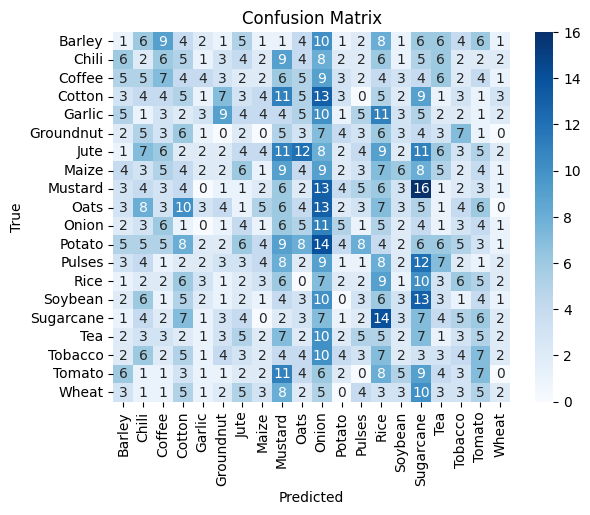

In [33]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [26]:
def recommend_crop(temperature, humidity, soil_ph, rainfall):
    # User input as a DataFrame
    user_input = pd.DataFrame([[temperature, humidity, soil_ph, rainfall]], columns=['Temperature', 'Humidity', 'Soil pH', 'Rainfall'])
    
    # Predict the crop
    crop_label = model.predict(user_input)[0]
    
    # Decode the prediction
    crop = encoder.inverse_transform([crop_label])[0]
    return crop

# Example user input 21,85,7.4,78,Tobacco
temperature = 49
humidity = 40
soil_ph = 7
rainfall = 100

recommended_crop = recommend_crop(temperature, humidity, soil_ph, rainfall)
print(f"The recommended crop for the given conditions is: {recommended_crop}")


The recommended crop for the given conditions is: Jute


In [27]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(model,f)